# 第14回　エキゾチック・オプションのプライシング例 

## はじめに

```
ここまでの例はほとんどすべて、理論的に正解が別にちゃんと分かるものとか、他の代替的な方法でもほとんど同じ結果になるとかいった例ばかりでしたから。
そこで、この講座の最後に、「これこそモンテカルロ・シミュレーションが必要だ！」という例をご紹介して終わりたい
```

## プライシング対象オプション

```
（１）　アベレージ・オプション
　コール／プット　：　コール
　満期　：　１年
　行使価格　：　毎月末のドル円為替レートの平均値

（２）　ルックバック・オプション
　コール／プット　：　コール
　満期　：　１年
　行使価格　：　毎月末のドル円為替レートの最小値
※いずれも、行使価格の決定には現在の為替レートは含まないものとします。

＜前提条件＞
　現在のドル円為替レート　：　１ドル ＝ 80 円
　円金利　：　0.2％
　ドル金利　：　0.5％
　ボラティリティ　：　10％
```


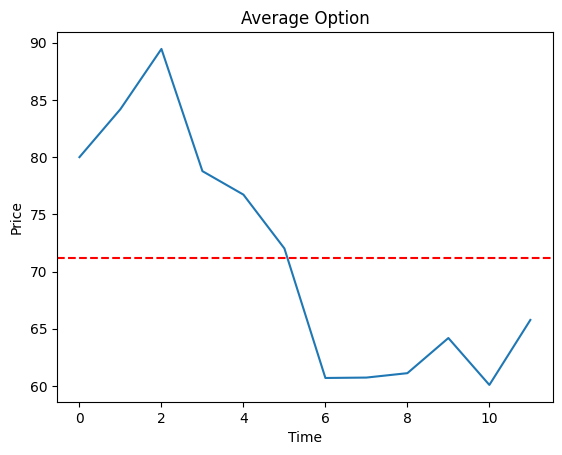

In [3]:
# アベレージオプションのイメージを描画する
import numpy as np
import matplotlib.pyplot as plt

## 横軸が期間、縦軸が価格のグラフを描画する
## グラフに行使価格を示す線(y=strike_price)を描画する
## xlableは全ての値を表示する
def plot_price(title, price, strike_price):
    plt.plot(price)
    plt.axhline(y=strike_price, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.show()

# 期間は1ヶ月ごとの12ヶ月
T = 12
# 価格の初期値
S0 = 80
# ボラティリティ
sigma = 0.1
# 毎月の為替は正規分布に従う
price = np.zeros(T)
price[0] = S0
# 簡易のため、為替は前月の為替に正規分布の乱数を加えるものとする
for t in range(1, T):
    price[t] = price[t-1] * (1 + np.random.normal(0, sigma))
# 行使価格は価格の平均値とする
strike_price = np.mean(price)
# 価格のグラフを描画
plot_price("Average Option", price, strike_price)

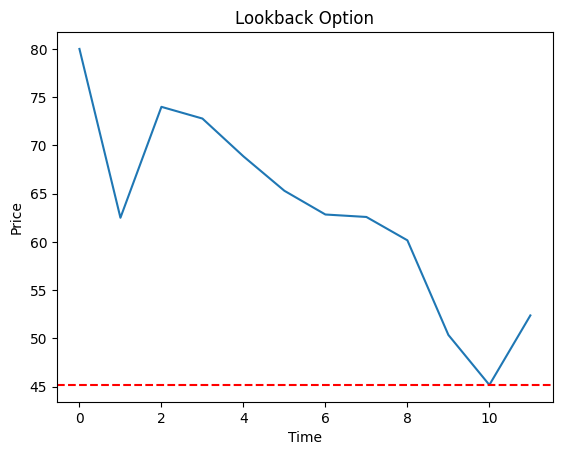

In [4]:
# ルックバックオプションのイメージを描画する
# 毎月の為替は正規分布に従う
price = np.zeros(T)
price[0] = S0
# 簡易のため、為替は前月の為替に正規分布の乱数を加えるものとする
for t in range(1, T):
    price[t] = price[t-1] * (1 + np.random.normal(0, sigma))
# 行使価格は価格の最小値とする
strike_price = np.min(price)
# 価格のグラフを描画
plot_price("Lookback Option", price, strike_price)

## 原資産価格のパスの作成

### プライシングの基本的考え方

- 原理はプレーンな通貨オプションの場合と全く同じで、「リスク中立経済下におけるオプションの将来価値の期待値」を現在価値に引き直せばよい
- 問題は、オプションの行使価格が為替レートの満期までの価格推移に基づいて決まるため、到底、オプション価値の期待値が解析的には求まりそうもないこと
- モンテカルロ・シミュレーションの出番
- シミュレーションによりオプション価値の平均値を求め、それを現在価値にすれば、リスク中立評価法の原理からほぼ正しい値になっているはず
- オプションの条件から、満期まで１ヶ月ごとの為替レート情報が必要です。 したがって、プレーンなオプションの場合と違い、１ヶ月ごとの為替レートを出力していくようなシミュレーションが必要になります
- 後は、基本となるモデル式の形やリスク中立確率下における μ の設定など、すべてプレーンな通貨オプションの場合と同じ


## シミュレーション

- $t$
  - その時点までの年数。
  - ${\frac{1}{12}}$ごと
- $Z$
  - 1ヶ月ごとのブラウン運動による増減
    - 12章では1年。14章では1ヶ月ごと → 分散を $\frac{1}{12}$
- $\Delta W$
  - $\sqrt{\frac{1}{12}}Z$
- $Wt$
  - $\Delta W$の合算値
  - その時点までのブラウン運動の履歴
- $S_T = S_{0}e^{\mu T+{\sigma}W_{T}}$
  - 指定した月の為替レート
- ${\mu} = r - q - \frac{\sigma^2}{2}$
  - リスク中立経済下における期待値

ドル金利 は 0.005
円金利 は 0.002
mu は -0.008
S0 は 80
ボラティリティ は 0.1
乱数のサンプル[ 0.30957479  1.28888738  3.09938961 -0.66124641  0.27576366]
delta_tのサンプル[ 0.08936654  0.37206974  0.89471671 -0.1908854   0.07960611]
Wtのサンプル[0.08936654 0.46143628 1.35615299 1.1652676  1.24487371]
Stのサンプル[80.66434228 83.66635533 91.43624321 89.64762677 90.3039021 ]
アベレージオプションの行使価格は 87.95150023319393
Stの最小値は 80.66434227776952
行使日の為替レートは 86.20424028373209


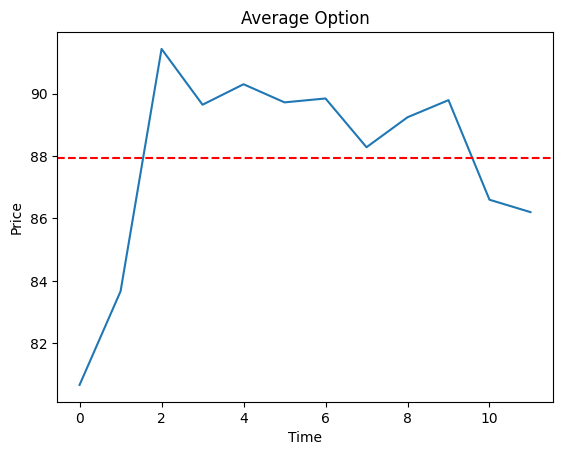

アベレージオプション価値は 0.0


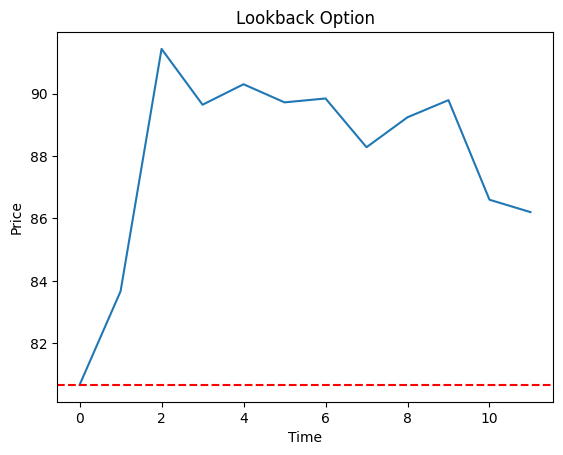

ルックバックオプション価値は 5.53989800596257


In [5]:
import numpy as np

d_rate = 0.005
print("ドル金利 は " + str(d_rate))
y_rate = 0.002
print("円金利 は " + str(y_rate))
m = 0.002 - 0.005 - (0.1 ** 2) / 2
print("mu は " + str(m))
S0 = 80
print("S0 は " + str(S0))
v = 0.1
print("ボラティリティ は " + str(v))
# tを設定(1/12から1までの12個の等差数列)
t = np.linspace(1/12, 1, 12)
# 標準正規分布に従う乱数をsim_count個生成
z = np.random.normal(0, 1, 12)
# 乱数の先頭5個を表示
print("乱数のサンプル" + str(z[:5]))
# deita_tを設定(z * sqrt(1/12))
delta_t = z * np.sqrt(1/12)
print("delta_tのサンプル" + str(delta_t[:5]))
# Wtを設定(0からcumsum(delta_t)までの累積和)
Wt = np.cumsum(delta_t)
print("Wtのサンプル" + str(Wt[:5]))
# Stを設定(S0 * eの(m * t + v * Wt)乗)
St = S0 * np.exp(m * t + v * Wt)
print("Stのサンプル" + str(St[:5]))
# アベレージオプションの行使価格
average_strike = np.mean(St)
print("アベレージオプションの行使価格は " + str(average_strike))
# ルックバックオプションの行使価格
lookback_strike = np.min(St)
print("Stの最小値は " + str(lookback_strike))
# 行使日の為替レート(t=12)
exercise_rate = St[-1]
print("行使日の為替レートは " + str(exercise_rate))
plot_price("Average Option", St, average_strike)

# 満期時のオプション価値
# アベレージオプションの価値は、行使日の価格とアベレージオプションの行使価格を比較して、その差が正ならばその差を、負ならば0を選ぶ
option_value = np.maximum(exercise_rate - average_strike, 0)
print("アベレージオプション価値は " + str(option_value))
plot_price("Lookback Option", St, lookback_strike)
# ルックバックオプションの価値は、行使日の価格とルックバックオプションの行使価格を比較して、その差が正ならばその差を、負ならば0を選ぶ
option_value = np.maximum(exercise_rate - lookback_strike, 0)
print("ルックバックオプション価値は " + str(option_value))



### シミュレーションの回数を増やしてオプション価値を求める

- シミュレーションの回数を決める
  - 指定した回数だけシミュレーション結果を保存する
  - （おまけ：使用メモリが分からないから分割実行させる）
- （おまけ：複利回数を指定できるようにする）
- シミュレーション結果の値の平均値＝オプションの（行使日の）価値
- オプションの価値から現在価格を計算

アベレージオプション価値は 1.669441162985048
ルックバックオプション価値は 4.687523519855499
アベレージオプションの現在価値は 1.666105617316595
ルックバックオプションの現在価値は 4.67815784161592
アベレージオプション価値の標準偏差は 0.0026275276817564093
ルックバックオプション価値の標準偏差は 0.004741842021814958


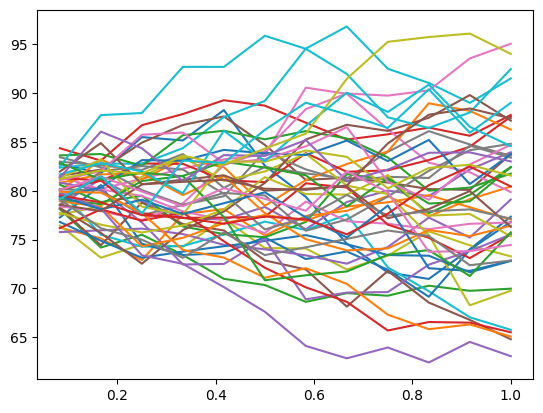

In [15]:
# ここまでの計算をシミュレーション回数分繰り返して、オプション価値の平均を求める

import numpy as np

# シミュレーション回数
sim_count = 1000000
# 1回の計算で実行するシミュレーション回数
batch_size = 100000
# 総処理数
total_processed = 0
d_rate = 0.005
y_rate = 0.002
# mu
m = y_rate - d_rate - (0.1 ** 2) / 2
# 現在の為替レート
S0 = 80
# ボラティリティ
v = 0.1
# 1年の複利回数(分割数。今回は12で固定)
divisions_in_year = 12
# シミュレーション結果を格納する配列
average_option_values = np.zeros(sim_count)
lookback_option_values = np.zeros(sim_count)
# tを設定(1/12から1までの12個の等差数列)。
t = np.linspace(1/divisions_in_year, 1, divisions_in_year)

# batch_sizeごとに繰り返し
while total_processed < sim_count:
    # batch_size分の乱数を生成する。1計算ごとにdivision_in_year回の乱数を生成する
    # 乱数はbatch_size * divisions_in_year個生成する
    z = np.random.normal(0, 1, batch_size * divisions_in_year)
    # 乱数を12個ごとに分割する
    z = z.reshape(batch_size, divisions_in_year)
    delta_t = z * np.sqrt(1/divisions_in_year)
    Wt = np.cumsum(delta_t, axis=1)
    # Stを設定(S0 * eの(m * t + v * Wt)乗)
    St = S0 * np.exp(m * t + v * Wt)
    # アベレージオプションの行使価格
    average_strike = np.mean(St, axis=1)
    # ルックバックオプションの行使価格
    lookback_strike = np.min(St, axis=1)
    # 行使日の為替レート(t=12)
    exercise_rate = St[:, -1]
    # 満期時のオプション価値
    # アベレージオプションの価値を計算。batch_size回の計算結果をbatchサイズのIndex以降に追加する
    average_option_values[total_processed:total_processed+batch_size] = np.maximum(exercise_rate - average_strike, 0)
    # ルックバックオプションの価値を計算
    lookback_option_values[total_processed:total_processed+batch_size] = np.maximum(exercise_rate - lookback_strike, 0)
    total_processed += batch_size
    
    # 最初の50個のStを横軸をT、縦軸を価格(St)として重ねて描画する
    if total_processed == batch_size:
        for i in range(50):
            plt.plot(t, St[i])
    


# オプション価値の平均を求める
average_option_value = np.mean(average_option_values)
lookback_option_value = np.mean(lookback_option_values)
print("アベレージオプション価値は " + str(average_option_value))
print("ルックバックオプション価値は " + str(lookback_option_value))
# オプションの現在価値。割引率は0.002
discount_rate = 0.002
average_option_value = average_option_value * np.exp(-discount_rate)
lookback_option_value = lookback_option_value * np.exp(-discount_rate)
print("アベレージオプションの現在価値は " + str(average_option_value))
print("ルックバックオプションの現在価値は " + str(lookback_option_value))
# オプション価値の標準偏差
average_option_value_std = np.std(average_option_values) * np.exp(-d_rate) / np.sqrt(sim_count)
lookback_option_value_std = np.std(lookback_option_values) * np.exp(-d_rate) / np.sqrt(sim_count)
print("アベレージオプション価値の標準偏差は " + str(average_option_value_std))
print("ルックバックオプション価値の標準偏差は " + str(lookback_option_value_std))



